# PRZYKŁAD 2.1 STR. 14
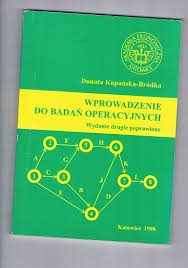

$ 
z = 18.5x_{1} + 20x_{2}  \to  max
$

$
\left\{
\begin{align} 
{0.05x_1+0.05x_2}  & \leqslant 1100 \\ 
{0.05x_1+0.10x_2} & \leqslant 1800 \\
{0.10x_1+0.05x_2} & \leqslant 2000 \\
{x_1} & \geqslant 0 \\ 
{x_2} & \geqslant 0  
\end{align}
\right. 
$

## Metoda graficzna

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,25000,75)
x,y = np.meshgrid(d,d)
plt.imshow( (((0.05*x)+(0.05*y)<=1100)&((0.05*x)+(0.10*y)<=1800)&((0.10*x)+(0.05*y)<=2000)&(x>=0)&(y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(-2,40000,75)
# -------------------------------
y1 = (1100-(0.05*x))/0.05
# -------------------------------
y2 = (1800-(0.05*x))/0.10
# -------------------------------
y3 = (2000-(0.10*x))/0.05
# -------------------------------
y4 = (x*0)+0 
# -------------------------------
#y5 =((-18.5*x)/20)     

# Make plot
plt.plot(x, y1, label=r'y1 = (1100-(0.05*x))/0.05')
plt.plot(x, y2, label=r'y2 = (1800-(0.05*x))/0.10')
plt.plot(x, y3, label=r'y3 = (2000-(0.10*x))/0.05')
plt.plot(x, y4, label=r'$y4 = 0$')
#plt.plot(x, y5, label=r'$y5 = 0$')
plt.xlim(0,40000)
plt.ylim(0,20000)

# strzałka: początek-(x=14000,y=15000), długość:-4000,-1000   
plt.arrow(14000, 15000, -4000, -1000, color='red', head_length = 700, head_width = 2500, length_includes_head = True)
plt.figtext(0.5, 0.7, "5-5-10 = 8000 ton, 5-10-5=14000 ton", ha="center", fontsize=11, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5, 0.8, "Wartości maksymalizujące zysk", ha="center", fontsize=13, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.legend(bbox_to_anchor=(2.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x = nawóz: 5-5-10$')
plt.ylabel(r'$y = nawóz: 5-10-5$')

Text(0, 0.5, '$y = nawóz: 5-10-5$')

## Metoda simplex

$ 
z = 18.5x_{1} + 20x_{2}  \to  max
$

$
\left\{
\begin{align} 
{0.05x_1+0.05x_2}  & \leqslant 1100 \\ 
{0.05x_1+0.10x_2} & \leqslant 1800 \\
{0.10x_1+0.05x_2} & \leqslant 2000 \\
{x_1} & \geqslant 0 \\ 
{x_2} & \geqslant 0  
\end{align}
\right. 
$

$$
G = \begin{bmatrix}
0.05 & 0.05 \\
0.05 & 0.10 \\
0.10 & 0.05 \\
-1 & 0 \\
0 & -1 
\end{bmatrix}
$$

$$
h = \begin{bmatrix}
1100 \\
1800 \\
2000 \\
0 \\
0
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
18.5 \\
20  
\end{bmatrix}
$$

In [2]:
from cvxopt import matrix
c = matrix([-18.5, -20]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.05,0.05,0.10,-1.0,0.0],[0.05, 0.10, 0.05,0.0,-1.0]])
h = matrix([ 1100.0, 1800.0, 2000.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 428000 zł

Macierz wielkości optymalnych: x1, x2

[[ 8000.]
 [14000.]]


In [3]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.00047227488387625106,
 'relative gap': 1.1034459914471488e-09,
 'primal objective': -427999.99958028883,
 'dual objective': -427999.999615708,
 'primal infeasibility': 6.923692262324416e-16,
 'dual infeasibility': 1.0307540370370804e-09,
 'primal slack': 7.867277570750068e-07,
 'dual slack': 9.668414785624458e-10,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 9}

## Sprawdzenie
http://www.maslowski.pl/index.php?id=simplex

$ 
z = 18.5x_{1} + 20x_{2}  \to  max
$

In [4]:
x1=8000
x2=14000
z = (18.5*x1)+(20*x2)
print('Zysk:', z)

Zysk: 428000.0


<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [5]:
from pulp import *
# Initialize Class
model = LpProblem("PRZYKŁAD_2.1_STR._14", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [6]:
LpVariable(name="wybór_nawozu", lowBound=0, upBound=None, cat='Internal', e=None)

wybór_nawozu

In [7]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')

$ 
z = 18.5x_{1} + 20x_{2}  \to  max
$

$
\left\{
\begin{align} 
{0.05x_1+0.05x_2}  & \leqslant 1100 \\ 
{0.05x_1+0.10x_2} & \leqslant 1800 \\
{0.10x_1+0.05x_2} & \leqslant 2000 \\
{x_1} & \geqslant 0 \\ 
{x_2} & \geqslant 0  
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [8]:
model += 18.5 * A + 20 * B

### Definiowanie ograniczeń

In [9]:
model += 0.05 * A + 0.05 * B <= 1100
model += 0.05 * A + 0.10 * B <= 1800
model += 0.10 * A + 0.05 * B <= 2000

In [10]:
# Solve Model
model.solve()
print("Należy produkować {} nawozu A".format(A.varValue))
print("Należy produkować {} nawozu B".format(B.varValue))

Należy produkować 8000.0 nawozu A
Należy produkować 14000.0 nawozu B


In [11]:
z = 18.5*8000+20*14000
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 428000.0


# PRZYKŁAD 2  STR 20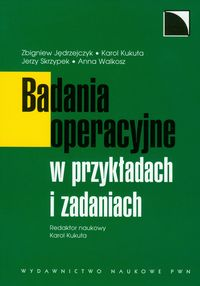

In [12]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Wyroby:", "N_1","N_2","Limity środków"]
table.append_row(["S_1", 6,  6, '<=36000'])
table.append_row(["S_2", 10, 5, '<=50000'])
table.append_row(["Limit surowca", '<=4000', '', ""])
print(table)

+---------------+--------+-----+----------------+
|    Wyroby:    |  N_1   | N_2 | Limity środków |
+---------------+--------+-----+----------------+
|      S_1      |   6    |  6  |    <=36000     |
+---------------+--------+-----+----------------+
|      S_2      |   10   |  5  |    <=50000     |
+---------------+--------+-----+----------------+
| Limit surowca | <=4000 |     |                |
+---------------+--------+-----+----------------+


# $ \bbox[10px,border:1px solid red]
{
z = x_{1} + x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{6x{_1}+6x{_2}}  & \leqslant 36000 & (2)\\ 
{10x{_1}+5x{_2}} & \leqslant 50000 & (3)\\ 
{x{_1}} & \geqslant 0 & (4)\\ 
{0} & \leqslant {x{_1}} \leqslant 4000  & (5)\\
\end{align}
\right. 
$

Text(0, 0.5, '$y$')

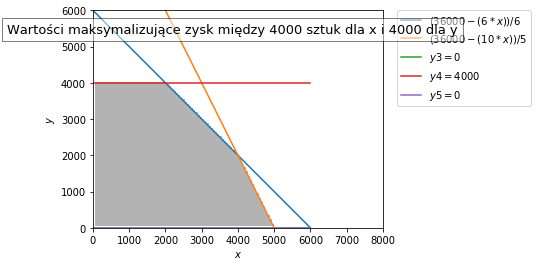

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,6000,100)
x,y = np.meshgrid(d,d)
plt.imshow( (((6*x)+(6*y)<=36000) & ((10*x)+(5*y)<=50000) & (x>=0) & (y<=4000)&(y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 6000, 10)
# ---------------------------------
y1 = ((36000-(6*x))/6)
# ---------------------------------
y2 = (50000-(10*x))/5
# ---------------------------------
y3 = (x*0)
# ---------------------------------
y4 = (x*0)+4000 
# ---------------------------------
y5 =(x*0)       

# Make plot
plt.plot(x, y1, label=r'$(36000-(6*x))/6$')
plt.plot(x, y2, label=r'$(36000-(10*x))/5$')
plt.plot(x, y3, label=r'$y3 =0$')
plt.plot(x, y4, label=r'$y4 = 4000$')
plt.plot(x, y5, label=r'$y5 = 0$')
plt.figtext(0.5, 0.8, "Wartości maksymalizujące zysk między 4000 sztuk dla x i 4000 dla y", ha="center", fontsize=13, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.xlim(0,8000)
plt.ylim(0,6000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Metoda simplex

$ \bbox[5px,border:1px solid red]
{
z = x_{1} + x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{6x{_1}+6x{_2}}  & \leqslant 36000 & (1)\\ 
{10x{_1}+5x{_2}} & \leqslant 50000 & (2)\\ 
{x{_1}} & \geqslant 0 & (3)\\ 
{0} & \leqslant {x{_1}} \leqslant 4000  & (4)\\
\end{align}
\right. 
$

$$
G = \begin{bmatrix}
6 & 6  \\
10 & 5  \\
-1 & 0 \\
1 & 0 \\
1 & 0
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
36000 \\
50000 \\
0 \\
0 \\
4000
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
1 \\
1 
\end{bmatrix}
$$

In [14]:
from cvxopt import matrix
c = matrix([-1.0, -1.0]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[6.0,10.0,-1.0,1.0,1.0],[6.0, 5.0, 0.0,0.0,0.0]])
h = matrix([ 36000.0, 50000.0, 0.0,0.0,4000.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 6000 zł

Macierz wielkości optymalnych: x1, x2

[[   0.]
 [6000.]]


## Sprawdzenie
http://www.maslowski.pl/index.php?id=simplex

$ \bbox[5px,border:1px solid red]
{
z = x_{1} + x_{2}  \to  max
\qquad (1)  
} $

In [15]:
x1=5000
x2=1000
z = x1+x2
print('Zysk:', z)

Zysk: 6000


<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [16]:
from pulp import *
# Initialize Class
model = LpProblem("PRZYKŁAD_2_STR._20", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [17]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [18]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
x1 = LpVariable('x1', lowBound=0, cat='Integer')
x2 = LpVariable('x2', lowBound=0, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
z = x_{1} + x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{6x{_1}+6x{_2}}  & \leqslant 36000 & (1)\\ 
{10x{_1}+5x{_2}} & \leqslant 50000 & (2)\\ 
{x{_1}} & \geqslant 0 & (3)\\ 
{0} & \leqslant {x{_1}} \leqslant 4000  & (4)\\
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [19]:
model +=  x1 + x2

### Definiowanie ograniczeń

In [20]:
model += 6  * x1 + 6 * x2 <= 36000
model += 10 * x1 + 5 * x2 <= 50000
model += x1 <= 4000

In [21]:
# Solve Model
model.solve()
print("Należy produkować {} nawozu x1".format(x1.varValue))
print("Należy produkować {} nawozu x2".format(x2.varValue))

Należy produkować 0.0 nawozu x1
Należy produkować 6000.0 nawozu x2


In [22]:
z =6000
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 6000


# PRZYKŁAD 3  STR 22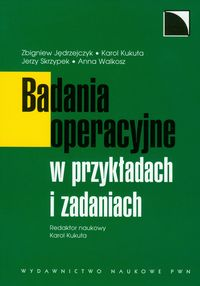

In [23]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["środki:", "W_1","W_2","W3","W4", "limit środków"]
table.append_row(["S_1", 1, 2, 1.5, 6, '<=90000'])
table.append_row(["S_2", 2, 2, 1.5, 4, '<=120000'])
table.append_row(["Zysk:",4, 6, 3, 12," "])
print(table)

+---------+-----+-----+-----+----+---------------+
| środki: | W_1 | W_2 | W3  | W4 | limit środków |
+---------+-----+-----+-----+----+---------------+
|   S_1   |  1  |  2  | 1.5 | 6  |    <=90000    |
+---------+-----+-----+-----+----+---------------+
|   S_2   |  2  |  2  | 1.5 | 4  |   <=120000    |
+---------+-----+-----+-----+----+---------------+
|  Zysk:  |  4  |  6  |  3  | 12 |               |
+---------+-----+-----+-----+----+---------------+


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 4x_{1} + 6x_{2}+ 3x_{3}+ 12x_{4}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_1+2x_2+1.5x_3+6x_4}  & \leqslant 90000 & (1)\\ 
{2x_1+2x_2+1.5x_3+4x_4} & \leqslant 120000 & (2)\\
{x_1} & \geqslant 0 & (3)\\ 
{x_2} & \geqslant 0 & (4)\\
{x_3} & \geqslant 0 & (5)\\ 
{x_4} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x
Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
1 & 2 & 1.5 & 6 \\
2 & 2 & 1.5 & 4 \\
-1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
90000 \\
120000 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
-4\\
-6\\
-3\\
-12
\end{bmatrix}
$$

W równaniu występuje więcej niż 2 wyroby więc tego zadania nie da sie rozwiązać za pomocą metody graficznej.

In [24]:
from cvxopt import matrix
c = matrix([-4.0, -6.0,-3.0,-12.0]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,2.0,-1.0,0.0,0.0,0.0],[2.0, 2.0, 0.0,-1.0,0.0,0.0],[1.5, 1.5, 0.0,0.0,-1.0,0.0],[6.0, 4.0, 0.0,0.0,0.0,-1.0]])
h = matrix([ 90000.0, 120000.0, 0.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 300000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[30000.]
 [30000.]
 [    0.]
 [    0.]]


Należy produkować 30 000 sztuk wyrobu A i B (czyli x1 i x2) a wyrobów B i C nie produkować. Łączny zysk ze sprzedaży wyrobów wyniesie: 300 000 zł

<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [25]:
from pulp import *
# Initialize Class
model = LpProblem("PRZYKŁAD_3_STR._22", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [26]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [27]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')
C = LpVariable('C', lowBound=0, cat='Integer')
D = LpVariable('D', lowBound=0, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 4x_{1} + 6x_{2}+ 3x_{3}+ 12x_{4}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_1+2x_2+1.5x_3+6x_4}  & \leqslant 90000 & (1)\\ 
{2x_1+2x_2+1.5x_3+4x_4} & \leqslant 120000 & (2)\\
{x_1} & \geqslant 0 & (3)\\ 
{x_2} & \geqslant 0 & (4)\\
{x_3} & \geqslant 0 & (5)\\ 
{x_4} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [28]:
model +=  4*A + 6*B + 3*C + 12*D 

### Definiowanie ograniczeń

In [29]:
model +=   A+2*B+1.5*C+6*D <= 90000
model += 2*A+2*B+1.5*C+4*D <= 120000

In [30]:
# Solve Model
model.solve()
print("Należy produkować {} A".format(A.varValue))
print("Należy produkować {} B".format(B.varValue))
print("Należy produkować {} C".format(C.varValue))
print("Należy produkować {} D".format(D.varValue))

Należy produkować 30000.0 A
Należy produkować 30000.0 B
Należy produkować 0.0 C
Należy produkować 0.0 D


In [31]:
z =A.varValue*4 + B.varValue*6 + C.varValue*3 + D.varValue*12
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 300000.0


# ZADANIE 1 STR. 26
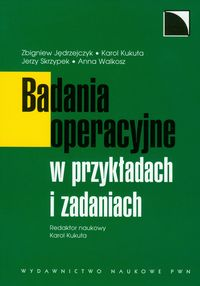

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = x_{1} + 3x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{3x_1+x_2}  & \leqslant 33 000 \\ 
{x_1+x_2} & \leqslant 13 000 \\ 
{5x_1+8x_2} & \leqslant 80 000 \\ 
{x_1} & \leqslant 7 000 \\ 
\end{align}
\right. 
$

Text(0, 0.5, '$y$')

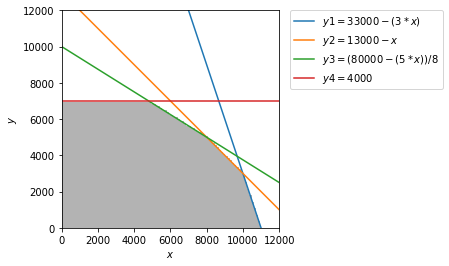

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,12000,100)
x,y = np.meshgrid(d,d)
plt.imshow( (((3*x)+(y)<=33000) & (x+y<=13000) & ((5*x)+(8*y)<=80000) & (y<=7000)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 12000, 10)
# 6x+6y<=36000
y1 = 33000-(3*x)
# 10x+5y <= 36000
y2 = 13000-x
# x >= 0 
y3 = (80000-(5*x))/8
# y <= 4000 
y4 = (x*0)+7000 
# y>=0
#y5 = x/4  
#y6 = x*(1/3)

# Make plot
plt.plot(x, y1, label=r'$y1 = 33000-(3*x)$')
plt.plot(x, y2, label=r'$y2 = 13000-x$')
plt.plot(x, y3, label=r'$y3 = (80000-(5*x))/8$')
plt.plot(x, y4, label=r'$y4 = 4000$')
#plt.plot(x, y5, label=r'$y5 = x/4$')
#plt.plot(x, y6, label=r'$y5 = x/4$')
plt.xlim(0,12000)
plt.ylim(0,12000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

1. Ponieważ zysk ze sprzedaży wyrobu y jest 3 razy większy niż zysk z wyrobu x, trzeba produkować maksymalne ilości wyrobu y. 
2. wyrobu y nie można produkować więcej niż 7000 sztuk - to przy ilości max y=7000 sztuk szukamy na wykresie punktu max ilości wyrobu x

Ten punkt to: x = 4800 i y = 7000 

In [33]:
g = (7000*3)+(4800*1)
print('Zysk maksymalny:',g)

Zysk maksymalny: 25800


Jeżeli zysk ze sprzedaży x wzrośnie z 1 zł do 4 zł.
Maksymulalizujemy tym razem wyrób x
x = 10000, y = 3000 to róg naszego szarego obszaru

ROGI SZAREGO OBSZARU TO SĄ OPTIMA LOKALNE.

# Metoda Simplex

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = x_{1} + 3x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{3x_1+x_2}  & \leqslant 33 000 \\ 
{x_1+x_2} & \leqslant 13 000 \\ 
{5x_1+8x_2} & \leqslant 80 000 \\ 
{x_1} & \leqslant 7 000 \\ 
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x
Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
3 & 1 \\
1 & 1 \\
5 & 8 \\
1 & 0 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
33000 \\
13000 \\
80000 \\
7000
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
1\\
3
\end{bmatrix}
$$

Działa dla drugiej części 4x1+3x2

In [34]:
from cvxopt import matrix
c = matrix([-4.0, -3.0]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[3.0,1.0,5.0,1.0],[1.0, 1.0, 8.0,0.0]])
h = matrix([33000.0, 13000.0, 80000.0,7000.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 44875 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[7000.]
 [5625.]]


<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [35]:
from pulp import *
# Initialize Class
model = LpProblem("Zadanie_1_STR._26", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [36]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [37]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0,upBound=7000, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = x_{1} + 3x_{2}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{3x_1+x_2}  & \leqslant 33 000 \\ 
{x_1+x_2} & \leqslant 13 000 \\ 
{5x_1+8x_2} & \leqslant 80 000 \\ 
{x_1} & \leqslant 7 000 \\ 
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [38]:
model +=  1*A + 3*B

### Definiowanie ograniczeń

In [39]:
model +=  3*A+B   <= 33000
model +=   A+B    <= 13000
model +=  5*A+8*B <= 80000

In [40]:
# Solve Model
model.solve()
print("Należy produkować {} A".format(A.varValue))
print("Należy produkować {} B".format(B.varValue))

Należy produkować 4800.0 A
Należy produkować 7000.0 B


In [41]:
z =A.varValue*1 + B.varValue*3 
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 25800.0


# ZADANIE 2 STR. 26
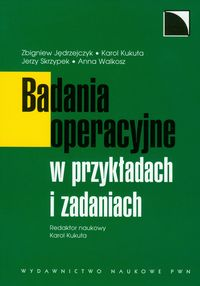

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 2x_{1} + 2.5x_{2}+4x_{3}+1.5x_{4}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_1+1.5x_2+2x_3+x_4}  & \leqslant 100 \\ 
{2x_1+2.5x_2+3x_3+0.5x_4} & \geqslant 50 \\ 
\end{align}
\right. 
$

http://www.maslowski.pl/index.php?id=simplex

<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [42]:
from pulp import *
# Initialize Class
model = LpProblem("Zadanie_2_STR._26", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [43]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [44]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')
C = LpVariable('C', lowBound=0, cat='Integer')
D = LpVariable('D', lowBound=0, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
F(x_a,x_b,x_c,x_d) = 2x_{a} + 2.5x_{b}+4x_{c}+1.5x_{d}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_a+1.5x_b+2x_c+x_d}  & \leqslant 100 \\ 
{2x_a+2.5x_b+3x_c+0.5x_d} & \geqslant 50 \\
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [45]:
model +=  2*A + 2.5*B + 4*C + 1.5*D

### Definiowanie ograniczeń

In [46]:
model +=  A+1.5*B+2*C+D   <= 100
model +=  2*A+2.5*B+3*C+0.5*D   >= 50

In [47]:
# Solve Model
model.solve()
print("Należy produkować {} A".format(A.varValue))
print("Należy produkować {} B".format(B.varValue))
print("Należy produkować {} C".format(C.varValue))
print("Należy produkować {} D".format(D.varValue))

Należy produkować 100.0 A
Należy produkować 0.0 B
Należy produkować 0.0 C
Należy produkować 0.0 D


In [48]:
z =A.varValue*2 + B.varValue*2.5+C.varValue*4+D.varValue*1.5 
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 200.0


# ZADANIE 3 STR. 26
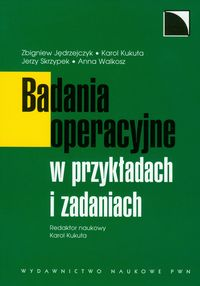

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 3x_{1} + 1.5x_{2}+4x_{3}+3.5x_{4}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_1+1.5x_3+2x_4}  & = 210 \\ 
{3x_3+x_4} & \geqslant 100 \\ 
{1.5x_1+2x_2+1,5x_4} & \leqslant 200 \\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
x_3\geqslant 0 \\
x_4\geqslant 0 \\
\end{align}
\right. 
$

http://www.maslowski.pl/index.php?id=simplex

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
1 & 0 & 1.5 & 2 \\
0 & 0 & -3 & -1 \\
1.5 & 2 & 0 & 1.5 \\
-1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
210 \\
100 \\
200 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
-3\\
-1.5\\
-4\\
-3.5
\end{bmatrix}
$$

Można macierze utworzyć za pomocą numpy

In [49]:
import numpy as np
from cvxopt import matrix

c = matrix(np.array([-3,-1.5,-4,-3.5]))
G = matrix(np.array([[1,0,1.5,2],[0,0,-3,-1],[1.5,2,0,1.5],[-1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]]))
h = matrix(np.array([210,100,200,0,0,0,0]))


## Sprawdzenie wymiarów macierzy

In [50]:
print('G = h',h.size[1] != G.size[0])
print('h',h.size)
print('G',G.size)

G = h True
h (7, 1)
G (7, 4)


In [51]:
from cvxopt import matrix
c = matrix([[-3.0,-1.5,-4.0,-3.5]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,0.0,1.5,-1.0,0.0,0.0,0.0],[0.0,0.0, 2.0,0.0,-1.0,0.0,0.0],[1.5,-3.0, 0.0, 0.0,0.0,-1.0,0.0],[2.0,-1.0, 1.5,0.0,0.0,0.0,-1.0]])
h = matrix([210.0,100.0,200.0,0.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 710 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[ -0.]
 [100.]
 [140.]
 [  0.]]


## Sprawdzenie wymiarów macierzy

In [52]:
print('G = h',h.size[1] != G.size[0])
print('h',h.size)
print('G',G.size)

G = h True
h (7, 1)
G (7, 4)


<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [53]:
from pulp import *
# Initialize Class
model = LpProblem("Zadanie_3_STR._26", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [54]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [55]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')
C = LpVariable('C', lowBound=0, cat='Integer')
D = LpVariable('D', lowBound=0, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 3x_{1} + 1.5x_{2}+4x_{3}+3.5x_{4}  \to  max
\qquad (1)  
} $

$
\left\{
\begin{align} 
{x_1+1.5x_3+2x_4}  & = 210 \\ 
{3x_3+x_4} & \geqslant 100 \\ 
{1.5x_1+2x_2+1,5x_4} & \leqslant 200 \\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
x_3\geqslant 0 \\
x_4\geqslant 0 \\
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [56]:
model +=  3*A + 1.5*B + 4*C + 3.5*D 

### Definiowanie ograniczeń

In [57]:
model +=   A+1.5*C+2*D == 210
model += 3*C+D >= 100
model += 1.5*A+2*B+1.5*D <= 200

In [58]:
# Solve Model
model.solve()
print("Należy produkować {} A".format(A.varValue))
print("Należy produkować {} B".format(B.varValue))
print("Należy produkować {} C".format(C.varValue))
print("Należy produkować {} D".format(D.varValue))

Należy produkować 0.0 A
Należy produkować 100.0 B
Należy produkować 140.0 C
Należy produkować 0.0 D


In [59]:
z =A.varValue*3 + B.varValue*1.5 + C.varValue*4 + D.varValue*3.5
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 710.0


# ZADANIE 4 STR. 27
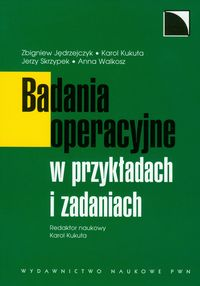

## Tabela ograniczeń

In [60]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Środki", "rasa S1","rasa S2","rasa S3", "Limit środków"]
table.append_row(["R", 10, 8, 8, 80000000])
table.append_row(["P1", 20, 30, 20,600000])
table.append_row(["P2", 10, 20, 30,600000])
table.append_row(["P3", 40, 60, 80,1200000])
table.append_row(["M1", 3, 3, 2, 300000])
table.append_row(["M2", 2, 1, 4, 400000])
print(table)

+--------+---------+---------+---------+---------------+
| Środki | rasa S1 | rasa S2 | rasa S3 | Limit środków |
+--------+---------+---------+---------+---------------+
|   R    |   10    |    8    |    8    |   80000000    |
+--------+---------+---------+---------+---------------+
|   P1   |   20    |   30    |   20    |    600000     |
+--------+---------+---------+---------+---------------+
|   P2   |   10    |   20    |   30    |    600000     |
+--------+---------+---------+---------+---------------+
|   P3   |   40    |   60    |   80    |    1200000    |
+--------+---------+---------+---------+---------------+
|   M1   |    3    |    3    |    2    |    300000     |
+--------+---------+---------+---------+---------------+
|   M2   |    2    |    1    |    4    |    400000     |
+--------+---------+---------+---------+---------------+


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3) = 0.9x_{1} + 2.2x_{2}+1.2x_{3}  \to  max
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{10x_1+8x_2+8x_3}  & \leqslant 80000000 \\ 
{20x_1+30x_2+20x_3} & \leqslant 600000 \\ 
{10x_1+20x_2+30x_3} & \leqslant 600000 \\
{40x_1+60x_2+80x_3} & \leqslant 1200000 \\
{3x_1+3x_2+2x_3} & \leqslant 300000 \\
{2x_1+1x_2+4x_3} & \leqslant 400000 \\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
x_3\geqslant 0 \\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
10 & 8 & 8   \\
20 & 30 & 20 \\
10 & 20 & 30 \\
40 & 60 & 80 \\
3 & 3 & 2 \\
2 & 1 & 4 \\
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
80000000 \\
600000 \\
600000 \\
1200000 \\
300000 \\
400000 \\
0\\
0\\
0
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
0.9\\
2.2\\
1.2
\end{bmatrix}
$$

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3) = 0.9x_{1} + 2.2x_{2}+1.2x_{3}  \to  max
\qquad (funkcja-celu)  
} $

In [61]:
from cvxopt import matrix
c = matrix([[-0.9,-2.2,-1.2]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[10.0,20.0,10.0,40.0,3.0,2.0,-1.0,0.0,0.0],[8.0,30.0,20.0,60.0,3.0,1.0,0.0,-1.0,0.0],[8.0,20.0,30.0,80.0,2.0,4.0,0.0,0.0,-1.0]])
h = matrix([80000000.0,600000.0,600000.0,1200000.0,300000.0,400000.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 44000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[   -0.]
 [20000.]
 [    0.]]


http://www.maslowski.pl/index.php?id=simplex

<span style="font-size: 180%;color:#0000ff"> Rozwiązanie przez PuLP</span>

In [62]:
from pulp import *
# Initialize Class
model = LpProblem("Zadanie_4_STR._27", LpMaximize)

<span style="font-size: 160%;color:black">Sposób uzycia: LpVariable.dicts</span>

### LpVariable(name, indexs, lowBound=None, upBound=None, cat='Continuous')

- name = Prex do nazwy każdej utworzonej zmiennej LP
- indexs = Lista ciągów kluczy do słownika zmiennych LP
- lowBound = dolna granica
- upBound = górna granica
- cat = typ zmiennych : Integer, Binary, Continuous (default)

In [63]:
LpVariable(name="Optymalny_asortyment", lowBound=0, upBound=None, cat='Internal', e=None)

Optymalny_asortyment

In [64]:
### Definiowanie zmiennych decyzyjnych

# Define Decision Variables
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')
C = LpVariable('C', lowBound=0, cat='Integer')

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3) = 0.9x_{1} + 2.2x_{2}+1.2x_{3}  \to  max
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{10x_1+8x_2+8x_3}  & \leqslant 80000000 \\ 
{20x_1+30x_2+20x_3} & \leqslant 600000 \\ 
{10x_1+20x_2+30x_3} & \leqslant 600000 \\
{40x_1+60x_2+80x_3} & \leqslant 1200000 \\
{3x_1+3x_2+2x_3} & \leqslant 300000 \\
{2x_1+1x_2+4x_3} & \leqslant 400000 \\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
x_3\geqslant 0 \\
\end{align}
\right. 
$

### Definiowanie funkcji celu

In [65]:
model +=  0.9*A + 2.2*B + 1.2*C

### Definiowanie ograniczeń

In [66]:
model +=  10*A+ 8*B+ 8*C <= 80000000
model +=  20*A+30*B+20*C <= 600000
model +=  10*A+20*B+30*C <= 600000
model +=  40*A+60*B+80*C <= 1200000
model +=  3 *A+ 3*B+ 2*C <= 300000
model +=  2 *A+   B+ 4*C <= 400000

In [67]:
# Solve Model
model.solve()
print("Należy produkować {} A".format(A.varValue))
print("Należy produkować {} B".format(B.varValue))
print("Należy produkować {} C".format(C.varValue))

Należy produkować 0.0 A
Należy produkować 20000.0 B
Należy produkować 0.0 C


In [68]:
z =A.varValue*0.9 + B.varValue*2.2 + C.varValue*1.2
print("Maksymalny zysk ze sprzedaży:", z)

Maksymalny zysk ze sprzedaży: 44000.0


In [69]:
2.2*20000

44000.0

# ZADANIE 5 STR. 27
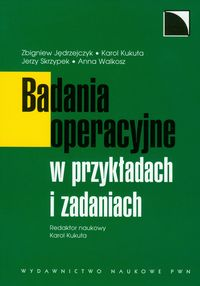

## Tabela ograniczeń

In [70]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyna", "Detal_1","Detal_2","Max czas pracy"]
table.append_row(["r1", 2, 1, 12])
table.append_row(["r2", 2, 2, 20])
print(table)

+---------+---------+---------+----------------+
| Maszyna | Detal_1 | Detal_2 | Max czas pracy |
+---------+---------+---------+----------------+
|   r1    |    2    |    1    |       12       |
+---------+---------+---------+----------------+
|   r2    |    2    |    2    |       20       |
+---------+---------+---------+----------------+


# Ilość produktu w1 ma być 2.5 raza większa od produktu w2

<<--- Załóżmy, że produktów x_1 naprawde już wyprodukowano 2.5 raza więceni niż produktów x2
Teraz żeby była równość ilość produktów x2 trzeba pomnozyć przez 2.5

$
x_1 = 2.5x_2 \\ 
0 = 2.5x_2-x_1 \\ 
0 = -x_1 + 2.5x_2 \\ 
$


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3) = 50x_{1} + 75x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{2x_1+x_2}  & \leqslant 12 \\ 
{2x_1+2x_2} & \leqslant 20 \\ 
{x_1} - 2.5{x_2} = 0\\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
2 & 1   \\
2 & 2   \\
-1 & 2.5 \\
-1 & 0 \\
0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
12 \\
20 \\
0 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
50\\
75
\end{bmatrix}
$$

In [71]:
from cvxopt import matrix
c = matrix([[-50.0,-75.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[2.0,2.0,-1.0,-1.0,0.0],[1.0,2.0,2.5,0.0,-1.0]])
h = matrix([12.0,20.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 400 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[5.]
 [2.]]


http://www.maslowski.pl/index.php?id=simplex

nie rozumime jak zostały zrobione proporcje pomiędzy x1 i x2

# PRZYKŁAD 2.1 STR. 14
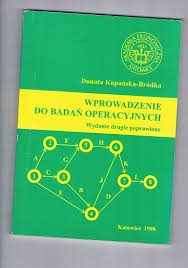

$ 
z = 18.5x_{1} + 20x_{2} +14.5 \to  max
$

$
\left\{
\begin{align} 
{0.05x_1+0.05x_2+0.05x_3}  & \leqslant 1100 \\ 
{0.05x_1+0.10x_2+0.05x_3} & \leqslant 1800 \\
{0.10x_1+0.05x_2+0.05x_3} & \leqslant 2000 \\
{x_1} & \geqslant 0 \\ 
{x_2} & \geqslant 0 \\
{x_3} & \geqslant 0
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
0.05 & 0.05 & 0.05   \\
0.05 & 0.10 & 0.05   \\
0.10 & 0.05 & 0.05   \\
-1 & 0 & 0  \\
0 & -1 & 0  \\
0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
1100 \\
1800 \\
2000 \\
0 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
18.5 \\
20 \\
14.5
\end{bmatrix}
$$

In [72]:
from cvxopt import matrix
import numpy as np

c = matrix([[-18.5,-20.0,-14.5]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.05,0.05,0.10,-1.0,0.0,0.0],[0.05,0.10,0.05,0.0,-1.0,0.0],[0.05,0.05,0.05,0.0,0.0,-1.0]])
h = matrix([1100.0,1800.0,2000.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 428000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[ 8000.]
 [14000.]
 [    0.]]


Produkcja nawozu 5-5-5 jest o rentowności 14.5 jest dla firmy nieopłacalna.

# ZADANIE 6 STR. 28
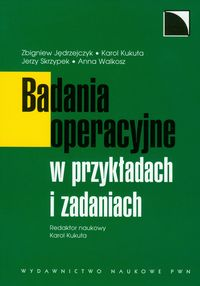

## Tabela ograniczeń

In [73]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Wyroby:", "Surowiec_1","Surowiec_2","Zysk zł/szt."]
table.append_row(["Wyrób_1", 12, 8, 50])
table.append_row(["Wyrób_2", 4, 8, 10])
table.append_row(["Limit surowca", '<=480', '<=640', ""])
print(table)

+---------------+------------+------------+--------------+
|    Wyroby:    | Surowiec_1 | Surowiec_2 | Zysk zł/szt. |
+---------------+------------+------------+--------------+
|    Wyrób_1    |     12     |     8      |      50      |
+---------------+------------+------------+--------------+
|    Wyrób_2    |     4      |     8      |      10      |
+---------------+------------+------------+--------------+
| Limit surowca |   <=480    |   <=640    |              |
+---------------+------------+------------+--------------+


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 50x_{1} + 10x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{x_1}  \leqslant {x_2} \\ 
{12}{x_1+4x_2} \leqslant 480 \\ 
{8}{x_1}+{8x_2} \leqslant 640\\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
\end{align}
\right. 
$

#### Metoda geometryczna

Text(0, 0.5, '$y$')

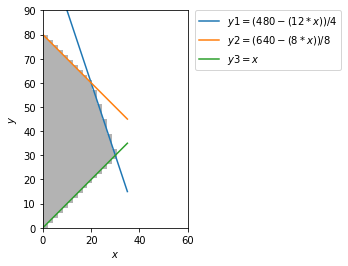

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,100,50)
x,y = np.meshgrid(d,d)
plt.imshow( (((12*x)+(4*y)<=480) & ((8*x)+(8*y)<=640) & (x<=y)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 35, 50)
# ---------------------------
y1 = (480-(12*x))/4
# ---------------------------
y2 = (640 -(8*x))/8
# ---------------------------
y3 = x
# ---------------------------
# ---------------------------
# --------------------------- 
# ---------------------------

# Make plot
plt.plot(x, y1, label=r'$y1 = (480-(12*x))/4$')
plt.plot(x, y2, label=r'$y2 = (640 -(8*x))/8$')
plt.plot(x, y3, label=r'$y3 = x$')
#plt.plot(x, y4, label=r'$y4 = 4000$')
#plt.plot(x, y5, label=r'$y5 = x/4$')
#plt.plot(x, y6, label=r'$y5 = x/4$')
plt.xlim(0,60)
plt.ylim(0,90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

poziom produkcji x=30 y=30 (bo y nie może być wieksze od x)

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 50x_{1} + 10x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

In [75]:
n = 50*30+10*30
print('Fmax:',n)

Fmax: 1800


#### Metoda SIMPLEX

$
\left\{
\begin{align} 
{x_1}  \leqslant {x_2} \\ 
{12}{x_1+4x_2} \leqslant 480 \\ 
{8}{x_1}+{8x_2} \leqslant 640\\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
1 & -1 \\
12 & 4 \\
8 & 8 & \\
-1 & 0 \\
0 & -1  
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
0   \\
480 \\
640 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
50 \\
10 
\end{bmatrix}
$$

In [76]:
from cvxopt import matrix
import numpy as np

c = matrix([[-50.0,-10.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,12.0,8.0,-1.0,0.0],[-1.0,4.0,8.0,0.0,-1.0]])
h = matrix([0.0,480.0,640.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 1800 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[30.]
 [30.]]


CZĘŚĆ DRUGA ZADANIA 

In [77]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Wyroby", "Zużycie surowca S1","Zużycie surowca S2","Zużycie surowca S3","Zysk jednostkowy (w zł)"]
table.append_row(["W1", 12, 8, 5, 50])
table.append_row(["W2", 4, 8, 7, 10])
print(table)

+--------+----------------+---------------+---------------+--------------------+
| Wyroby | Zużycie surowc | Zużycie surow | Zużycie surow | Zysk jednostkowy ( |
|        |      a S1      |     ca S2     |     ca S3     |       w zł)        |
+--------+----------------+---------------+---------------+--------------------+
|   W1   |       12       |       8       |       5       |         50         |
+--------+----------------+---------------+---------------+--------------------+
|   W2   |       4        |       8       |       7       |         10         |
+--------+----------------+---------------+---------------+--------------------+


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 50x_{1} + 10x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{x_1}  \leqslant {x_2} \\ 
{12}{x_1+4x_2} \leqslant 480 \\ 
{8}{x_1}+{8x_2} \leqslant 640\\
5{x_1}+7{x_2} \leqslant 350\\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
\end{align}
\right. 
$

#### Metoda geometryczna

Text(0, 0.5, '$y$')

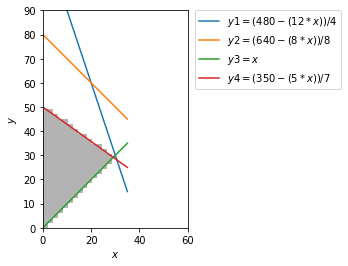

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,100,50)
x,y = np.meshgrid(d,d)
plt.imshow( (((12*x)+(4*y)<=480)&((5*x)+(7*y)<=350) & ((8*x)+(8*y)<=640) & (x<=y)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 35, 50)
# ---------------------------
y1 = (480-(12*x))/4
# ---------------------------
y2 = (640 -(8*x))/8
# ---------------------------
y3 = x
# ---------------------------
y4 = (350-(5*x))/7
# ---------------------------
# --------------------------- 
# ---------------------------

# Make plot
plt.plot(x, y1, label=r'$y1 = (480-(12*x))/4$')
plt.plot(x, y2, label=r'$y2 = (640 -(8*x))/8$')
plt.plot(x, y3, label=r'$y3 = x$')
plt.plot(x, y4, label=r'$y4 = (350-(5*x))/7$')
#plt.plot(x, y5, label=r'$y5 = x/4$')
#plt.plot(x, y6, label=r'$y5 = x/4$')
plt.xlim(0,60)
plt.ylim(0,90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

poziom produkcji x=30 y=30 (bo y nie może być wieksze od x)

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 50x_{1} + 10x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

In [79]:
n = 50*30+10*30
print('Fmax:',n)

Fmax: 1800


#### Metoda SIMPLEX

$
\left\{
\begin{align} 
{x_1}  \leqslant {x_2} \\ 
{12}{x_1+4x_2} \leqslant 480 \\ 
{8}{x_1}+{8x_2} \leqslant 640\\
5{x_1}+7{x_2} \leqslant 350\\
x_1\geqslant 0 \\
x_2\geqslant 0 \\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
1 & -1 \\
12 & 4 \\
8 & 8  \\
5 & 7 \\
-1 & 0 \\
0 & -1  
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
0   \\
480 \\
640 \\
350 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
50 \\
10 
\end{bmatrix}
$$

In [80]:
from cvxopt import matrix
import numpy as np

c = matrix([[-50.0,-10.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,12.0,8.0,5.0,-1.0,0.0],[-1.0,4.0,8.0,7.0,0.0,-1.0]])
h = matrix([0.0,480.0,640.0,350.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 1750 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[29.2]
 [29.2]]


# ZADANIE 7 STR. 28
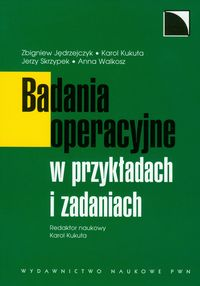

## Tabela ograniczeń

In [81]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Surowce", "wyrób K","wyrób L","Limit surowców"]
table.append_row(["S1", 8, 16, 96000])
table.append_row(["S2", 7, 4, 56000])
print(table)

+---------+---------+---------+----------------+
| Surowce | wyrób K | wyrób L | Limit surowców |
+---------+---------+---------+----------------+
|   S1    |    8    |   16    |     96000      |
+---------+---------+---------+----------------+
|   S2    |    7    |    4    |     56000      |
+---------+---------+---------+----------------+


$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 2x_{1} + 4x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{8x_1+16x_2}  & \leqslant 96000 & (1)\\ 
{7x_1+4x_2} & \leqslant 56000 & (2)\\
{x_1} & \leqslant 5000 & (3)\\ 
{x_2} & \leqslant 4000 & (4)\\
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

#### Metoda geometryczna

Text(0, 0.5, '$y$')

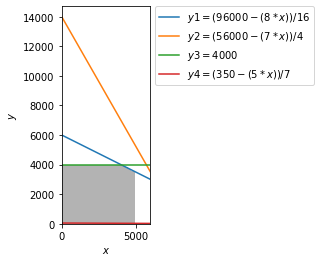

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-2,6000,50)
x,y = np.meshgrid(d,d)
plt.imshow( (((8*x)+(16*y)<=96000)&((7*x)+(4*y)<=56000) & (x<=5000) & (y<=4000)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 6000, 50)
# ---------------------------
y1 = (96000-(8*x))/16
# ---------------------------
y2 = (56000 -(7*x))/4
# ---------------------------
y3 = (x*0)+4000
# ---------------------------

# ---------------------------
# --------------------------- 
# ---------------------------

# Make plot
plt.plot(x, y1, label=r'$y1 = (96000-(8*x))/16$')
plt.plot(x, y2, label=r'$y2 = (56000 -(7*x))/4$')
plt.plot(x, y3, label=r'$y3 = 4000$')
plt.plot(x, y4, label=r'$y4 = (350-(5*x))/7$')
#plt.plot(x, y5, label=r'$y5 = x/4$')
#plt.plot(x, y6, label=r'$y5 = x/4$')
#plt.xlim(0,60)
#plt.ylim(0,90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 2x_{1} + 4x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{8x_1+16x_2}  & \leqslant 96000 & (1)\\ 
{7x_1+4x_2} & \leqslant 56000 & (2)\\
{x_1} & \leqslant 5000 & (3)\\ 
{x_2} & \leqslant 4000 & (4)\\
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
8 & 16 \\
7 & 4 \\
1 & 0  \\
0 & 1 \\
-1 & 0 \\
0 & -1  
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
96000   \\
56000 \\
5000 \\
4000 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
2 \\
4 
\end{bmatrix}
$$

In [83]:
from cvxopt import matrix
import numpy as np

c = matrix([[-2.0,-4.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[8.0,7.0,1.0,0.0,-1.0,0.0],[16.0,4.0,0.0,1.0,0.0,-1.0]])
h = matrix([96000.0,56000.0,5000.0,4000.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 24000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[4219.3]
 [3890.3]]


http://www.maslowski.pl/index.php?id=simplex


# ZADANIE 8 STR. 29

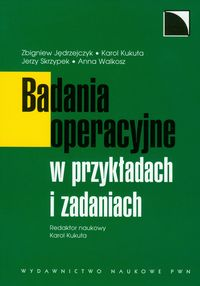

## Tabela ograniczeń

In [84]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny", "czas pracy na wyrób: I","czas pracy na wyrób: II","Limit surowców"]
table.append_row(["O1", 3, 1, 18000])
table.append_row(["O2", 2, 4, 40000])
table.append_row(["F", 3, 2, 24000])
print(table)

+---------+------------------------+-------------------------+----------------+
| Maszyny | czas pracy na wyrób: I | czas pracy na wyrób: II | Limit surowców |
+---------+------------------------+-------------------------+----------------+
|   O1    |           3            |            1            |     18000      |
+---------+------------------------+-------------------------+----------------+
|   O2    |           2            |            4            |     40000      |
+---------+------------------------+-------------------------+----------------+
|    F    |           3            |            2            |     24000      |
+---------+------------------------+-------------------------+----------------+


#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 6x_{1} + 4x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{3x_1+x_2}  & \leqslant 18000 & (1)\\ 
{2x_1+4x_2} & \leqslant 40000 & (2)\\
{3x_1+2x_2} & \leqslant 24000 & (2)\\
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
3 & 1 \\
2 & 4 \\
3 & 2  \\
-1 & 0 \\
0 & -1  
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
18000   \\
40000 \\
2400 \\
0 \\
0 
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
6 \\
4 
\end{bmatrix}
$$

In [85]:
from cvxopt import matrix
import numpy as np

c = matrix([[-6.0,-4.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[3.0,2.0,3.0,-1.0,0.0],[1.0,4.0,2.0,0.0,-1.0]])
h = matrix([18000.0,40000.0,24000.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 48000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[2839.3]
 [7741. ]]


### Podpunkt 1

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 7x_{1} + 5x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

In [86]:
from cvxopt import matrix
import numpy as np

c = matrix([[-7.0,-5.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[3.0,2.0,3.0,-1.0,0.0],[1.0,4.0,2.0,0.0,-1.0]])
h = matrix([18000.0,40000.0,24000.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 59000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[2000.]
 [9000.]]


### Podpunkt 2

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 7x_{1} + 5x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{3x_1+x_2}  & \leqslant 18000 & (1)\\ 
{2x_1+4x_2} & \leqslant 40000 & (2)\\
{3x_1+2x_2} & \leqslant 24000 & (3)\\
x_1+1.5x_2 & \geqslant 0 &  (4)\\ 
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

### <span style="font-size: 150%;color:red">Wyrobu II należy wyprodukować 1.5 raza więcej niż wyrobu I</span>

czyli na jeden wyrób II ma przypadać 0.667 wyrobu I

1.5x=y    <----- żeby była równowaga, na jednego y przypada 1.5 x

y-1.5x = 0

-1.5x +y =0

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
3 & 1 \\
2 & 4 \\
3 & 2  \\
-1.5& 1\\
-1 & 0 \\
0 & -1  
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
18000   \\
40000 \\
2400 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
6 \\
4 
\end{bmatrix}
$$

In [87]:
from cvxopt import matrix
import numpy as np

c = matrix([[-6.0,-4.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[3.0,2.0,3.0,-1.5,-1.0,0.0],[1.0,4.0,2.0,1.0,0.0,-1.0]])
h = matrix([18000.0,40000.0,24000.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 48000 zł

Macierz wielkości optymalnych: x1, x2

[[4000.]
 [6000.]]


# ZADANIE 9 STR. 29

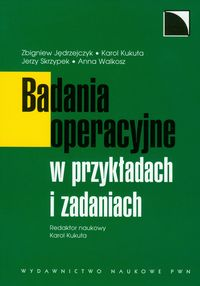

## Tabela ograniczeń

In [88]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Surowce", "Wyrób: I","Wyrób: II","Wyrób: III","Limit surowców"]
table.append_row(["S1", 1.5 , 3, 4, 1500])
table.append_row(["S2", 3   , 2, 1, 1200])
print(table)

+---------+----------+-----------+------------+----------------+
| Surowce | Wyrób: I | Wyrób: II | Wyrób: III | Limit surowców |
+---------+----------+-----------+------------+----------------+
|   S1    |   1.5    |     3     |     4      |      1500      |
+---------+----------+-----------+------------+----------------+
|   S2    |    3     |     2     |     1      |      1200      |
+---------+----------+-----------+------------+----------------+


#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2, x_3) = 12x_{1} + 18x_{2}+ 12x_{3}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{1.5x_1+3x_2+4x_3}  & \leqslant 1500 & (1)\\ 
{3x_1+2x_2+x_3} & \leqslant 1200 & (2)\\
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
{x_3} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
1.5 & 3 & 4 \\
3   & 2 & 1 \\
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
1500   \\
1200 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
12 \\
18 \\
12
\end{bmatrix}
$$

In [89]:
from cvxopt import matrix
import numpy as np

c = matrix([[-12.0,-18.0,-12.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.5,3.0,-1.0,0.0,0.0],[3.0,2.0,0.0,-1.0,0.0],[4.0,1.0,0.0,0.0,-1.0]])
h = matrix([1500.0,1200.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 9300 zł

Macierz wielkości optymalnych: x1, x2

[[100.]
 [450.]
 [  0.]]


# ZADANIE 10 STR. 30

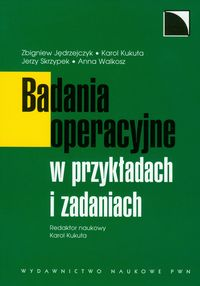

## Tabela ograniczeń

In [90]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Surowce", "Wyrób: I","Wyrób: II","Wyrób: III","Limit surowców"]
table.append_row(["S1", 5, 3,  0, 3600])
table.append_row(["S2", 1, 2,  4, 4800])
table.append_row(["Zysk:", 10, 24,  12, 0])

print(table)

+---------+----------+-----------+------------+----------------+
| Surowce | Wyrób: I | Wyrób: II | Wyrób: III | Limit surowców |
+---------+----------+-----------+------------+----------------+
|   S1    |    5     |     3     |     0      |      3600      |
+---------+----------+-----------+------------+----------------+
|   S2    |    1     |     2     |     4      |      4800      |
+---------+----------+-----------+------------+----------------+
|  Zysk:  |    10    |    24     |     12     |       0        |
+---------+----------+-----------+------------+----------------+


#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2, x_3) = 10x_{1} + 24x_{2}+ 12x_{3}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{5x_1+3x_2+}  & \leqslant 3600 & (1)\\ 
{x_1+2x_2+4x_3} & \leqslant 4800 & (2)\\
{x_1} & \geqslant 0 & (5)\\ 
{x_2} & \geqslant 0 & (6)\\
{x_3} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
5 & 3 & 0 \\
1 & 2 & 4 \\
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
3600   \\
4800 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
10 \\
24 \\
12
\end{bmatrix}
$$

In [91]:
from cvxopt import matrix
import numpy as np

c = matrix([[-10.0,-24.0,-12.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[5.0,1.0,-1.0,0.0,0.0],[3.0,2.0,0.0,-1.0,0.0],[0.0,4.0,0.0,0.0,-1.0]])
h = matrix([3600.0,4800.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 36000 zł

Macierz wielkości optymalnych: x1, x2

[[   0.]
 [1200.]
 [ 600.]]


# ZADANIE 11 STR. 30

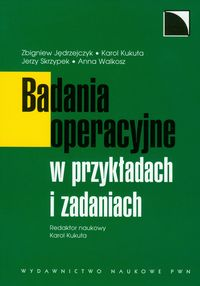

#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 20x_{1} + 30x_{2}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{x_1+x_2}  & \leqslant 12000 & (1)\\ 
{-x_1+2x_2} & \geqslant 2000 & (2)\\
{2x_1+2x_2}  & \geqslant 18000 & (3)\\ 
{-2x_1+3x_2}  & \leqslant 6000 & (4)\\ 
{x_1} & \geqslant 3000 & (5)\\
{x_1} & \leqslant 7000 & (5)\\
{x_2} & \geqslant 4000 & (5)\\
{x_2} & \leqslant 8000 & (5)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
 1  & 1 \\
 1  & -2 \\
 -2 & -2 \\
-2 & 3 \\
-1 & 0 \\
 1 & 0 \\
 0 & -1 \\
 0 & 1 
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
12000 \\
2000  \\
18000 \\
6000 \\
3000 \\
7000 \\
4000 \\
8000 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
20 \\
30 
\end{bmatrix}
$$

In [92]:
from cvxopt import matrix
import numpy as np

c = matrix([[-20.0,-30.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,1.0,-2.0,-2.0,-1.0,1.0,0.0,0.0],[1.0,-2.0,-2.0,3.0,0.0,0.0,-1.0,1.0]])
h = matrix([12000.0,2000.0,18000.0,6000.0,3000.0,7000.0,4000.0,8000.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 300000 zł

Macierz wielkości optymalnych: x1, x2

[[6000.]
 [6000.]]


In [93]:
from cvxopt import matrix
import numpy as np

c = matrix([[-30.0,-20.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[1.0,1.0,-2.0,-2.0,-1.0,1.0,0.0,0.0],[1.0,-2.0,-2.0,3.0,0.0,0.0,-1.0,1.0]])
h = matrix([12000.0,2000.0,18000.0,6000.0,3000.0,7000.0,4000.0,8000.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 310000 zł

Macierz wielkości optymalnych: x1, x2

[[7000.]
 [5000.]]


# ZADANIE 12 STR. 31

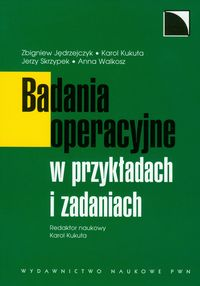

## Tabela ograniczeń

In [94]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Surowce", "Wyrób: A","Wyrób: B","Wyrób: C","Wyrób: D","Limit surowców"]
table.append_row(["S1", 0.5, 0.4,  0.4, 0.2, 2000])
table.append_row(["S2", 0.4, 0.2,  0.0, 0.5, 2800])
table.append_row(["Zysk:", 10, 14,  8, 11,0])

print(table)

+---------+----------+----------+----------+----------+----------------+
| Surowce | Wyrób: A | Wyrób: B | Wyrób: C | Wyrób: D | Limit surowców |
+---------+----------+----------+----------+----------+----------------+
|   S1    |   0.5    |   0.4    |   0.4    |   0.2    |      2000      |
+---------+----------+----------+----------+----------+----------------+
|   S2    |   0.4    |   0.2    |   0.0    |   0.5    |      2800      |
+---------+----------+----------+----------+----------+----------------+
|  Zysk:  |    10    |    14    |    8     |    11    |       0        |
+---------+----------+----------+----------+----------+----------------+


#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 10x_{1} + 14x_{2}+ 8x_{3} + 11x_{4}  \to  max 
\qquad (funkcja-celu)  
} $

$
\left\{
\begin{align} 
{0.5x_1+0.4x_2+0.4x_3+0.2x_4}  & \leqslant 2000 & (1)\\ 
{0.4x_1+0.2x_2+0.5x_4} & \leqslant 2800 & (2)\\
{x_1} & \geqslant 0 & (3)\\
{x_2} & \geqslant 0 & (4)\\
{x_3} & \geqslant 0 & (5)\\
{x_4} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
 0.5 & 0.4 & 0.4 & 0.2 \\
 0.4 & 0.2 & 0.0 & 0.5 \\
 -1 & 0 & 0 & 0  \\
 0 & -1 & 0 & 0 \\
 0 & 0 & -1 & 0 \\
 0 & 0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
2000 \\
2800  \\
0 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
10 \\
14 \\
8  \\
11 
\end{bmatrix}
$$

In [95]:
from cvxopt import matrix
import numpy as np

c = matrix([[-10.0,-14.0,-8.0,-11.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.5,0.4,-1.0,0.0,0.0,0.0],[0.4,0.2,0.0,-1.0,0.0,0.0],[0.4,0.0,0.0,0.0,-1.0,0.0],[0.2,0.5,0.0,0.0,0.0,-1.0]])
h = matrix([2000.0,2800.0,0.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2')
print()
print(x)

Zysk dla ustawień optymalnych: 88000 zł

Macierz wielkości optymalnych: x1, x2

[[   0.]
 [2750.]
 [   0.]
 [4500.]]


# ZADANIE 13 STR. 31

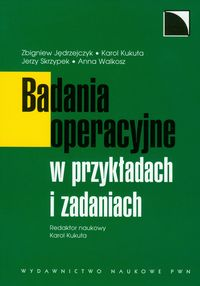

## Tabela ograniczeń

In [96]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Wyroby", "Zużycie surowca: S1","Zużycie surowca: S2","Zysk jednostkowy "]
table.append_row(["x1", 0.3, 0.6,  18.0 ])
table.append_row(["x2", 0.5, 0.2,  10.0 ])
table.append_row(["x3", 0.1, 0.4,  8.0  ])
table.append_row(["x4", 0.1, 0.2,  4.0  ])
table.append_row(["Limit zu. sur.:", 600, 1800,  0.0  ])
print(table)

+-----------------+--------------------+--------------------+------------------+
|     Wyroby      | Zużycie surowca: S | Zużycie surowca: S | Zysk jednostkowy |
|                 |         1          |         2          |                  |
+-----------------+--------------------+--------------------+------------------+
|       x1        |        0.3         |        0.6         |       18.0       |
+-----------------+--------------------+--------------------+------------------+
|       x2        |        0.5         |        0.2         |       10.0       |
+-----------------+--------------------+--------------------+------------------+
|       x3        |        0.1         |        0.4         |       8.0        |
+-----------------+--------------------+--------------------+------------------+
|       x4        |        0.1         |        0.2         |       4.0        |
+-----------------+--------------------+--------------------+------------------+
| Limit zu. sur.: |        6

#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2,x_3,x_4) = 18x_{1} + 10x_{2}+ 8x_{3} + 4x_{4}  \to  max 
\qquad (funkcja-celu)  
} $


### $
\left\{
\begin{align} 
{0.3x_1+0.5x_2+0.1x_3+0.1x_4}  & \leqslant 600 & (1)\\ 
{0.6x_1+0.2x_2+0.4x_4+0.2x_4} & \leqslant 1800 & (2)\\
{x_1} & \geqslant 0 & (3)\\
{x_2} & \geqslant 0 & (4)\\
{x_3} & \geqslant 0 & (5)\\
{x_4} & \geqslant 0 & (6)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
 0.3 & 0.5 & 0.1 & 0.1 \\
 0.6 & 0.2 & 0.4 & 0.2 \\
 -1 & 0 & 0 & 0  \\
 0 & -1 & 0 & 0 \\
 0 & 0 & -1 & 0 \\
 0 & 0 & 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
600 \\
1800  \\
0 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
18 \\
10 \\
8  \\
4 
\end{bmatrix}
$$

In [97]:
from cvxopt import matrix
import numpy as np

c = matrix([[-18.0,-10.0,-8.0,-4.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.3,0.6,-1.0,0.0,0.0,0.0],[0.5,0.2,0.0,-1.0,0.0,0.0],[0.1,0.4,0.0,0.0,-1.0,0.0],[0.1,0.2,0.0,0.0,0.0,-1.0]])
h = matrix([600.0,1800.0,0.0,0.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 42000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[1000.]
 [   0.]
 [3000.]
 [   0.]]


# ZADANIE 14 STR. 32

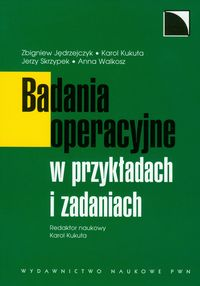

## Tabela ograniczeń

In [98]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Surowce", "Wyrób: A","Wyrób: B","Jednostkowa cena zbytu "]
table.append_row(["S1", 0.4, 0.6,  480.0 ])
table.append_row(["S2", 0.1, 0.3,  150.0 ])
table.append_row(["Limit zu. sur.:", 90, 180,0])
print(table)

+-----------------+----------+----------+-------------------------+
|     Surowce     | Wyrób: A | Wyrób: B | Jednostkowa cena zbytu  |
+-----------------+----------+----------+-------------------------+
|       S1        |   0.4    |   0.6    |          480.0          |
+-----------------+----------+----------+-------------------------+
|       S2        |   0.1    |   0.3    |          150.0          |
+-----------------+----------+----------+-------------------------+
| Limit zu. sur.: |    90    |   180    |            0            |
+-----------------+----------+----------+-------------------------+


#### Metoda SIMPLEX

$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 90x_{1} + 180x_{2} \to  max 
\qquad (funkcja-celu)  
} $

#### $
\left\{
\begin{align} 
{0.4x_1+0.6x_2}  & \leqslant 480 & (1)\\ 
{0.1x_1+0.3x_2} & \leqslant 150 & (2)\\
{x_1} & \geqslant 0 & (3)\\
{x_2} & \geqslant 0 & (4)\\
\end{align}
\right. 
$

Gdy jest znak >= zmieniamy znak liczb przy x

Gdy funkcja celu dąży do max to zmienamy znaki liczb przy x

$$
G = \begin{bmatrix}
 0.4 & 0.6\\
 0.1 & 0.3\\
 -1 & 0 \\
 0 & -1 \\
\end{bmatrix}
$$


$$
h = \begin{bmatrix}
480 \\
150  \\
0 \\
0 
\end{bmatrix}
$$

$$
c = \begin{bmatrix}
90 \\
180 
\end{bmatrix}
$$

In [99]:
from cvxopt import matrix
import numpy as np

c = matrix([[-90.0,-180.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.4,0.1,-1.0,0.0],[0.6,0.3,0.0,-1.0]])
h = matrix([480.0,150.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 117000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[900.]
 [200.]]


# w CENACH exportowych
$ \bbox[5px,border:1px solid red]
{
F(x_1,x_2) = 20x_{1} + 80x_{2} \to  max 
\qquad (funkcja-celu)  
} $

In [100]:
from cvxopt import matrix
import numpy as np

c = matrix([[-20.0,-80.0]]) ## <== przy Maxymalizacji oba znaki mają być ujemne
G = matrix([[0.4,0.1,-1.0,0.0],[0.6,0.3,0.0,-1.0]])
h = matrix([480.0,150.0,0.0,0.0])


from cvxopt import solvers

solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
sol = solvers.lp(c, G, h)
zysk = sol['primal objective']


print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
x =np.array(sol['x']).round(1)
print()
print('Macierz wielkości optymalnych: x1, x2, x3, x4')
print()
print(x)

Zysk dla ustawień optymalnych: 40000 zł

Macierz wielkości optymalnych: x1, x2, x3, x4

[[  0.]
 [500.]]
